In [1]:
!pip install ultralytics==8.0.196
!pip install roboflow
!pip install streamlit
!pip install ultralytics==8.0.196
!pip install roboflow
!pip install --upgrade ray
!pip install -U ray[tune]
!pip install -U ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 5.0 MB/s eta 0:00:00a 0:00:01
8.0.196
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 1.4 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 30.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 MB 22.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: ray
    Found existing installation: ray 2.24.0
    Uninstalling ray-2.24.0:
      Successfully uninstalled ray-2.24.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 634.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.1/871.1 kB 5.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.196
    Uninstalling ultralytics-8.0.196:
      Successfully uni

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
from IPython import display
display.clear_output()

import ultralytics
print(ultralytics.__version__)

ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5846.2/8062.4 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="ijeTVCjBjjAlhEWscUpN")
project = rf.workspace("aliiii").project("aqua-man")
version = project.version(1)
dataset = version.download("yolov8")

/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to aqua-man-1 in yolov8:: 100%|██████████| 3080/3080 [00:00<00:00, 6300.08it/s]


In [5]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/kaggle/working
100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 143MB/s]
Ultralytics YOLOv8.2.82 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/datasets/aqua-man-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

In [6]:
!ls {HOME}/runs/detect/train/

F1_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch2.jpg
P_curve.png					   train_batch3360.jpg
R_curve.png					   train_batch3361.jpg
args.yaml					   train_batch3362.jpg
confusion_matrix.png				   val_batch0_labels.jpg
confusion_matrix_normalized.png			   val_batch0_pred.jpg
events.out.tfevents.1724707381.f4029b4bdd18.138.0  val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


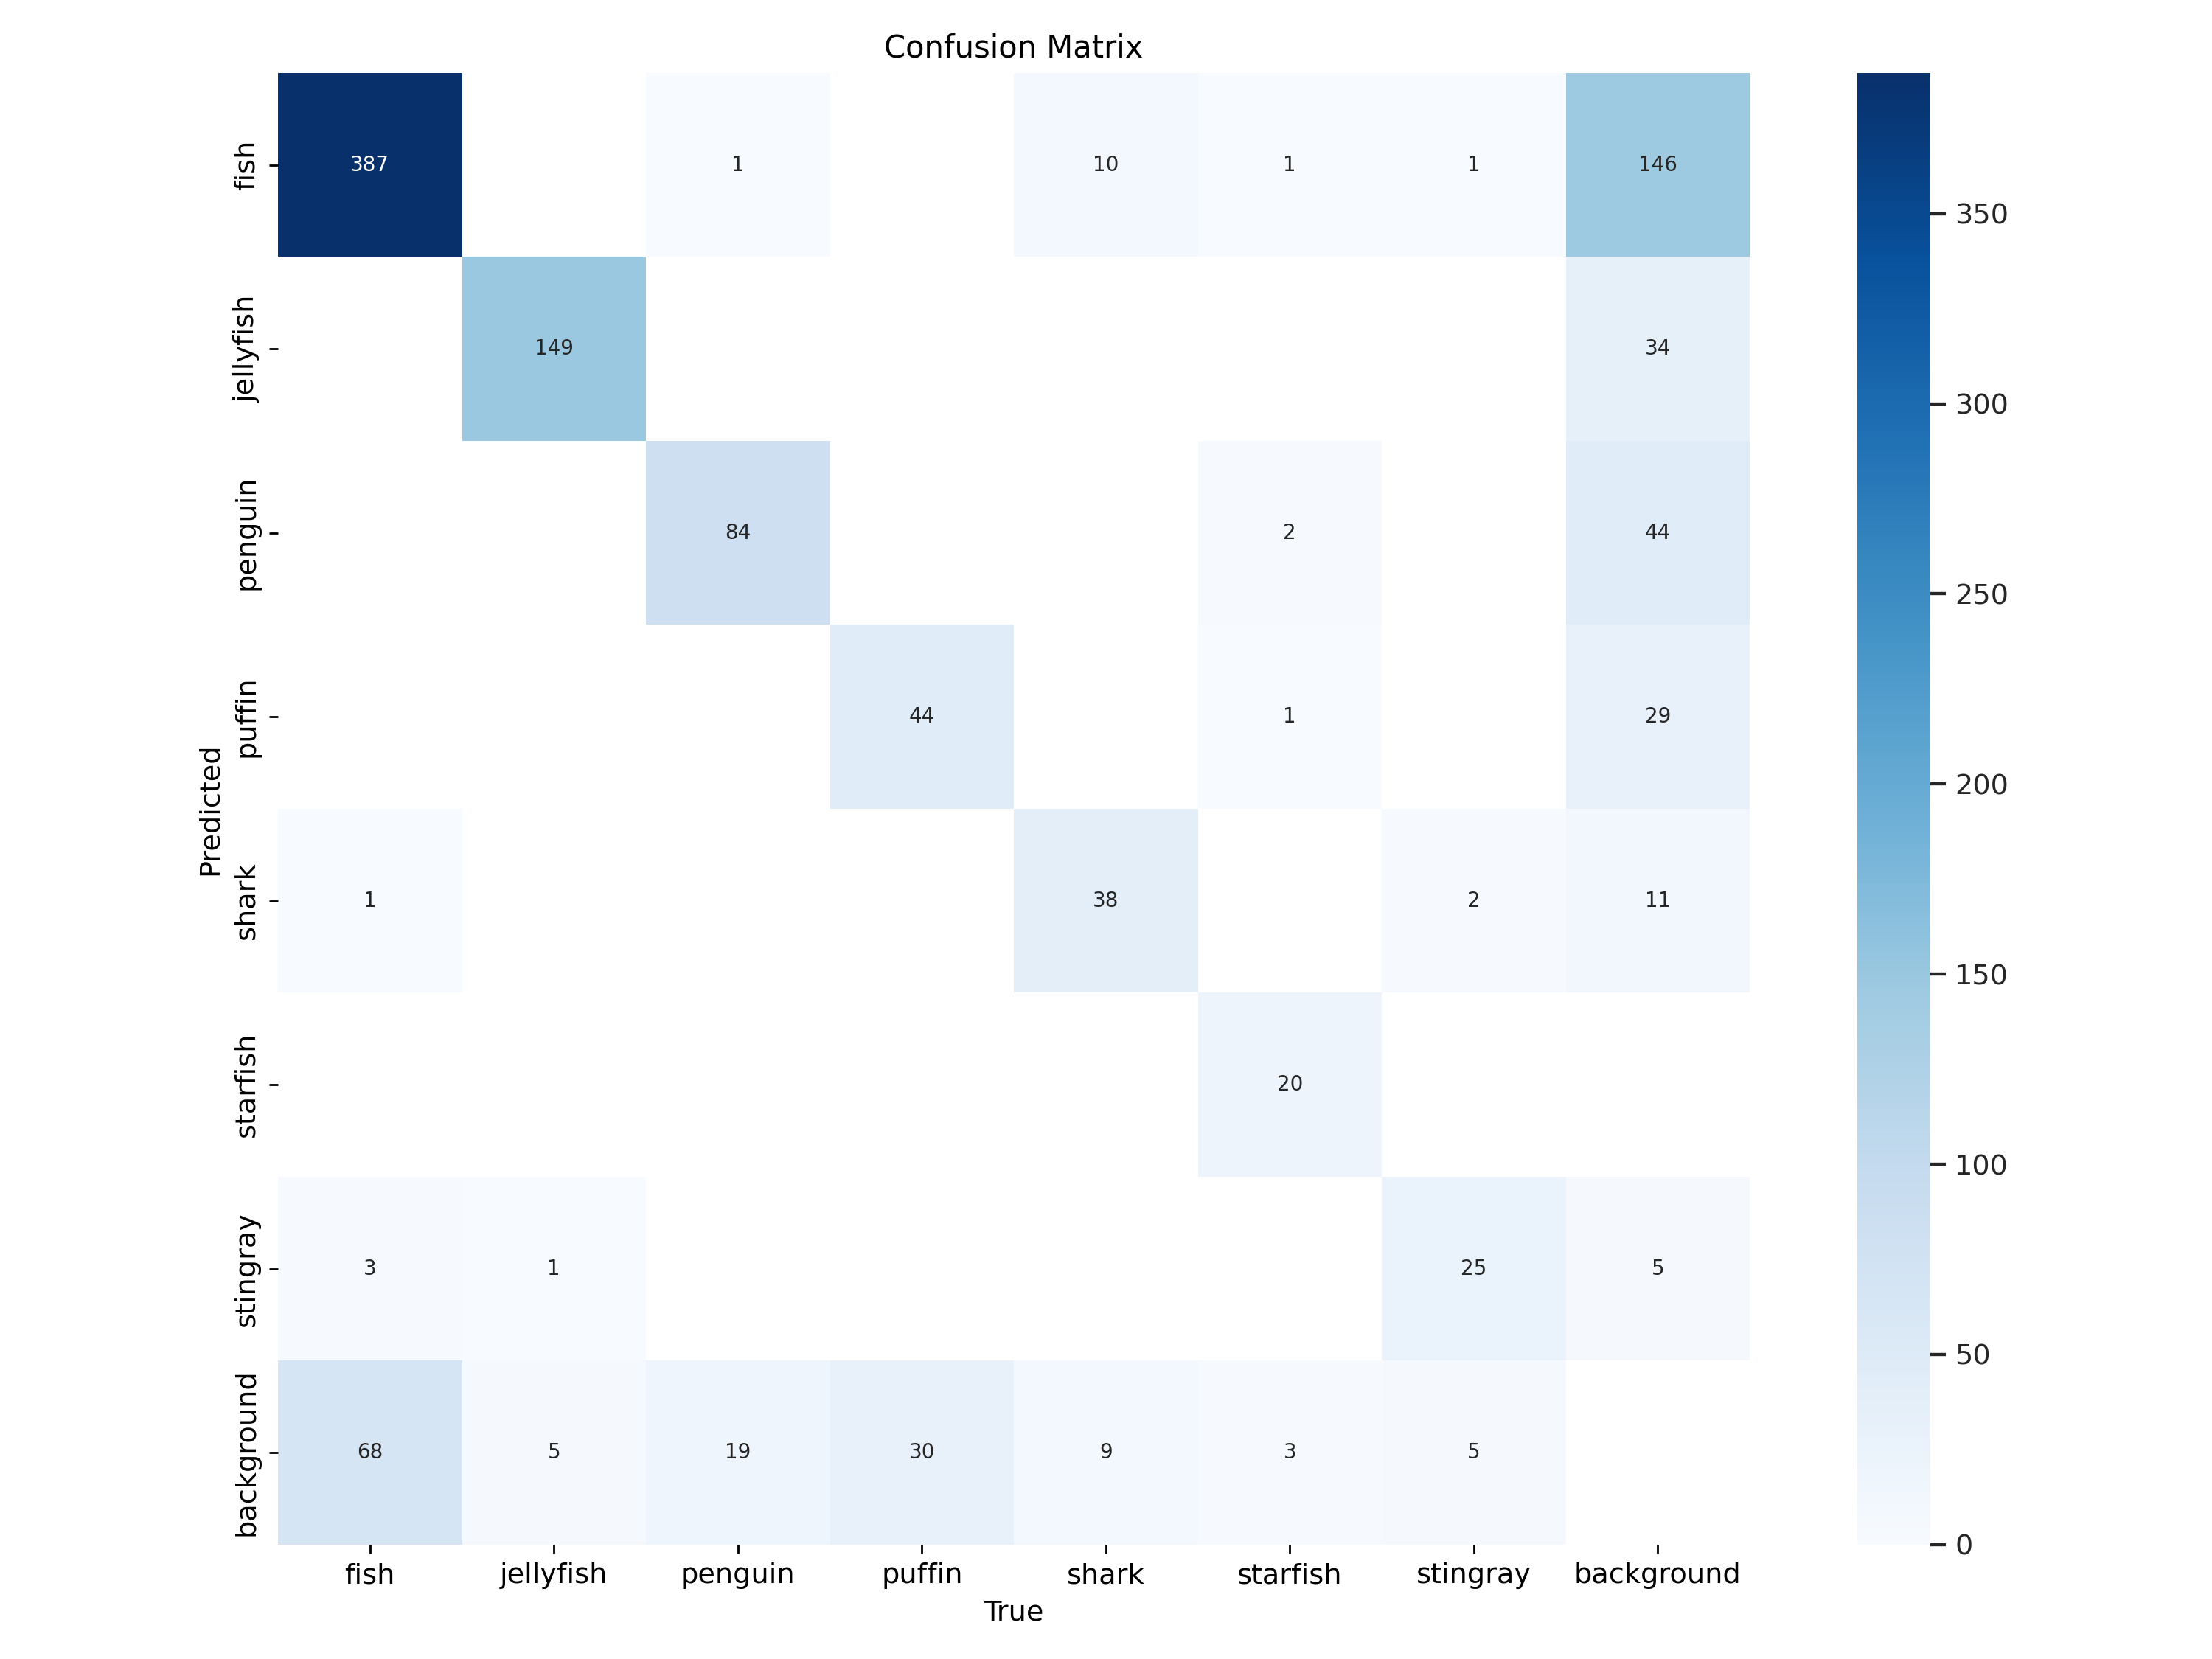

In [7]:
from IPython.display import Image
Image(filename='/kaggle/working/runs/detect/train/confusion_matrix.png', width=600)

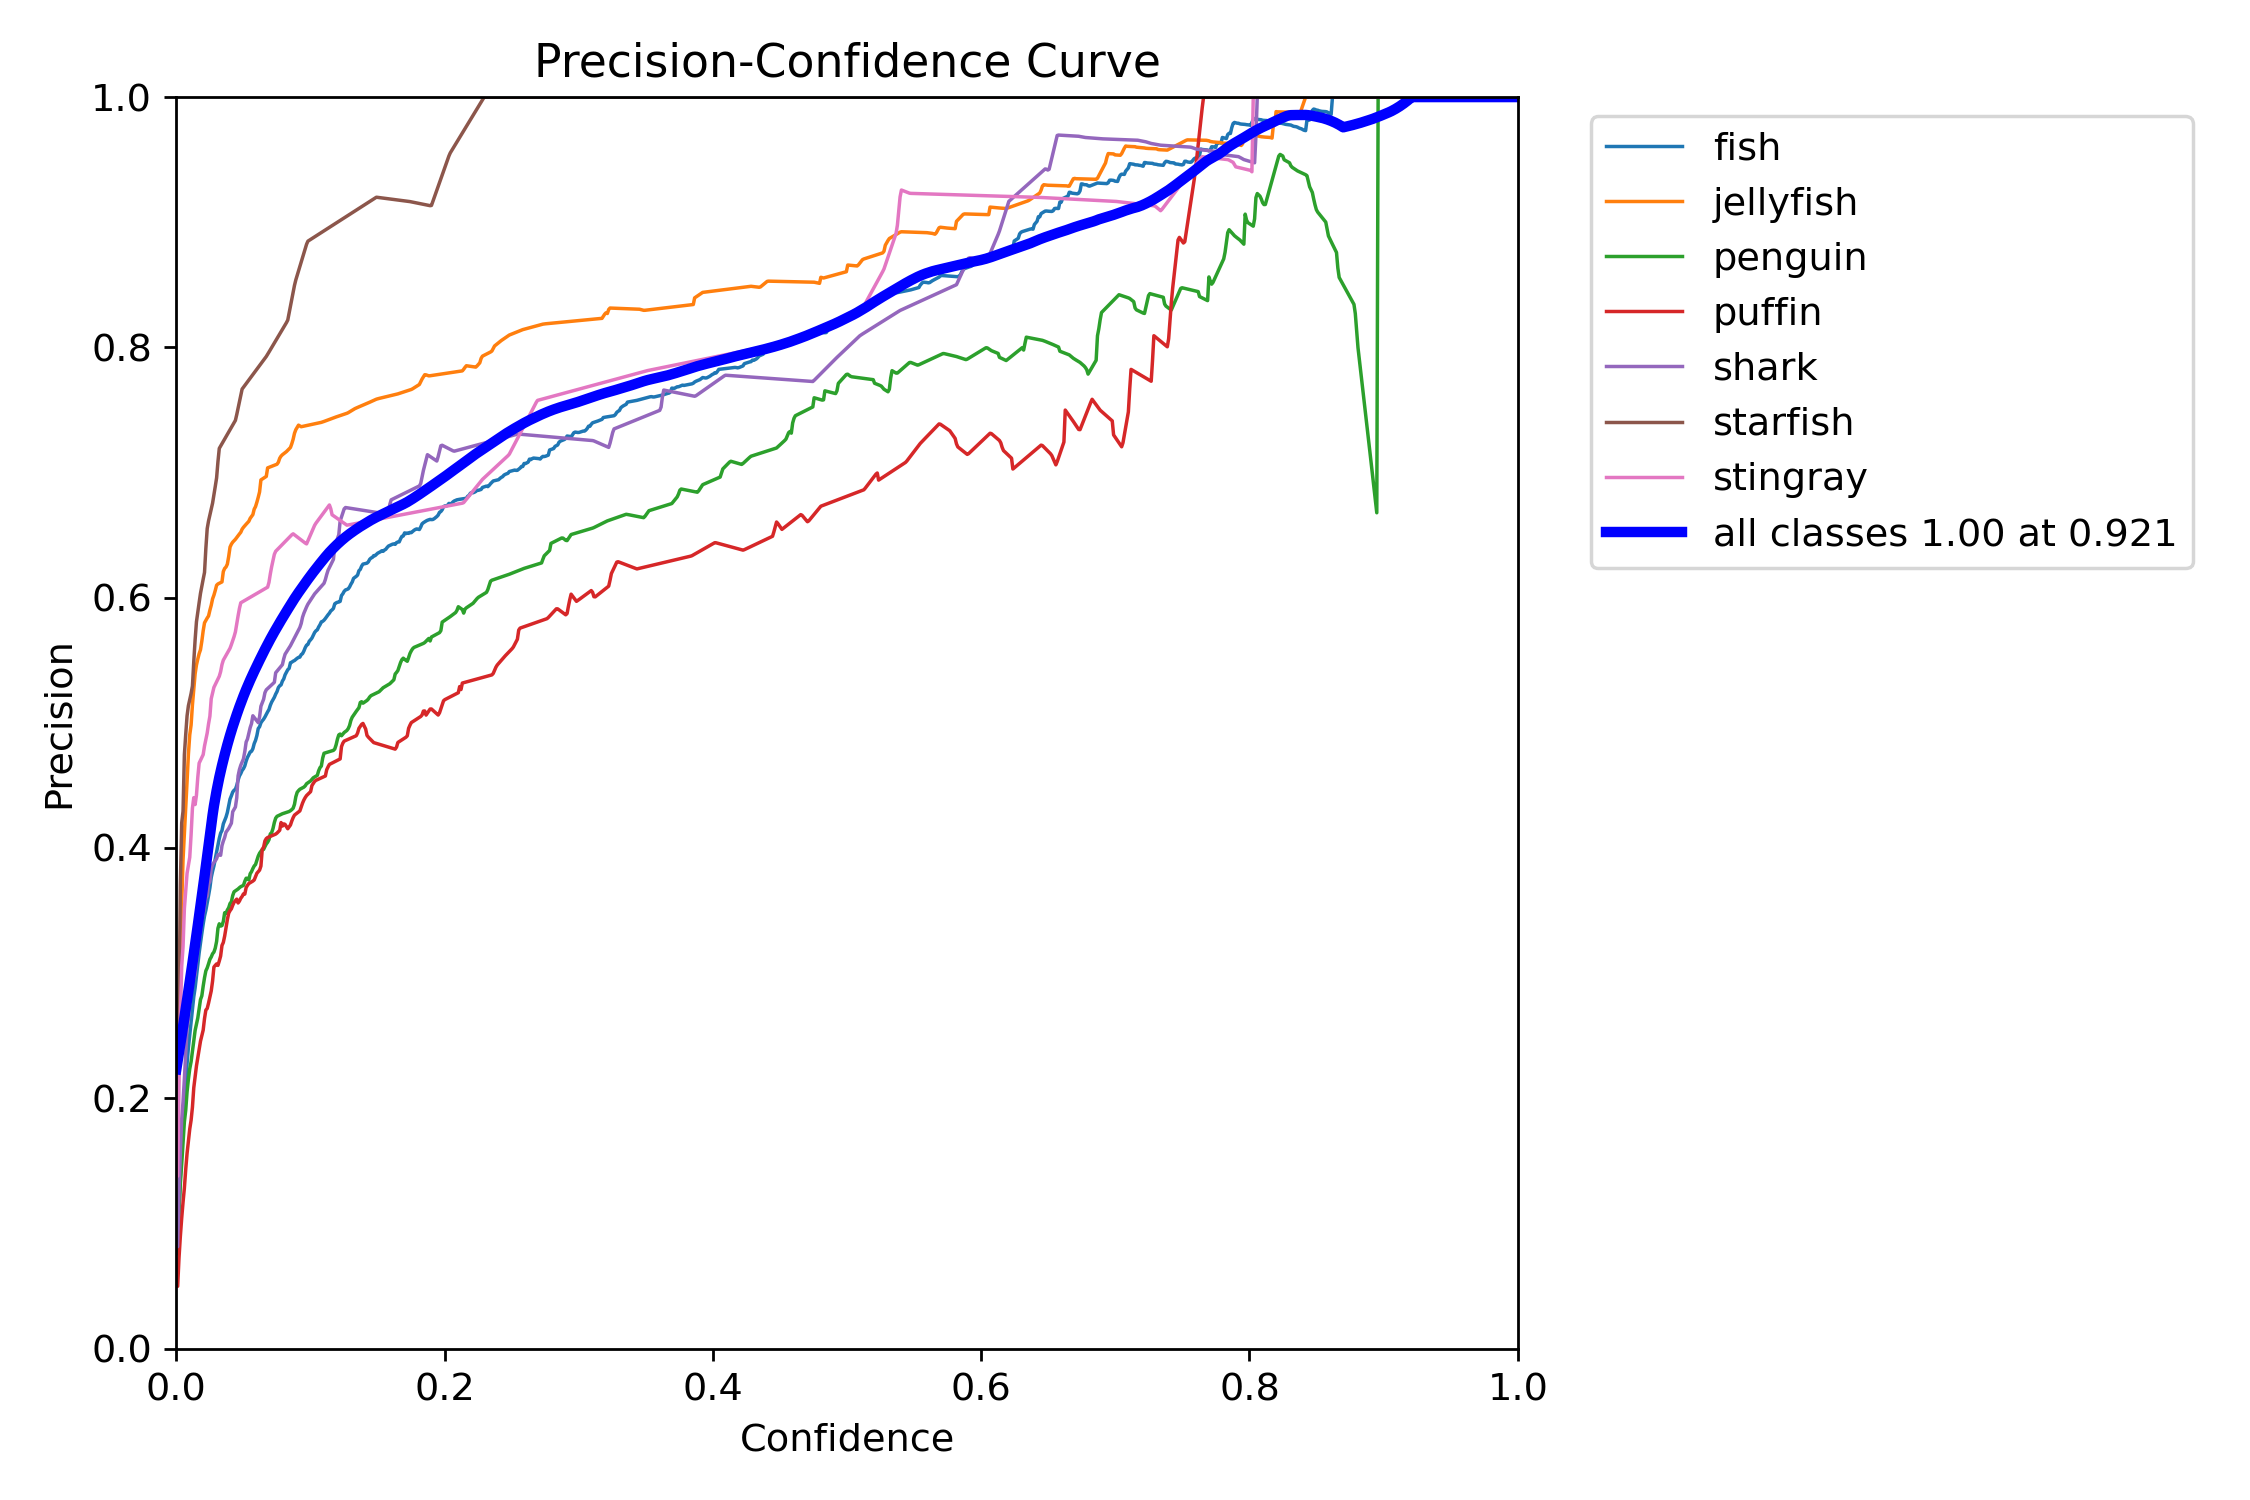

In [8]:
Image(filename='/kaggle/working/runs/detect/train/P_curve.png', width=600)

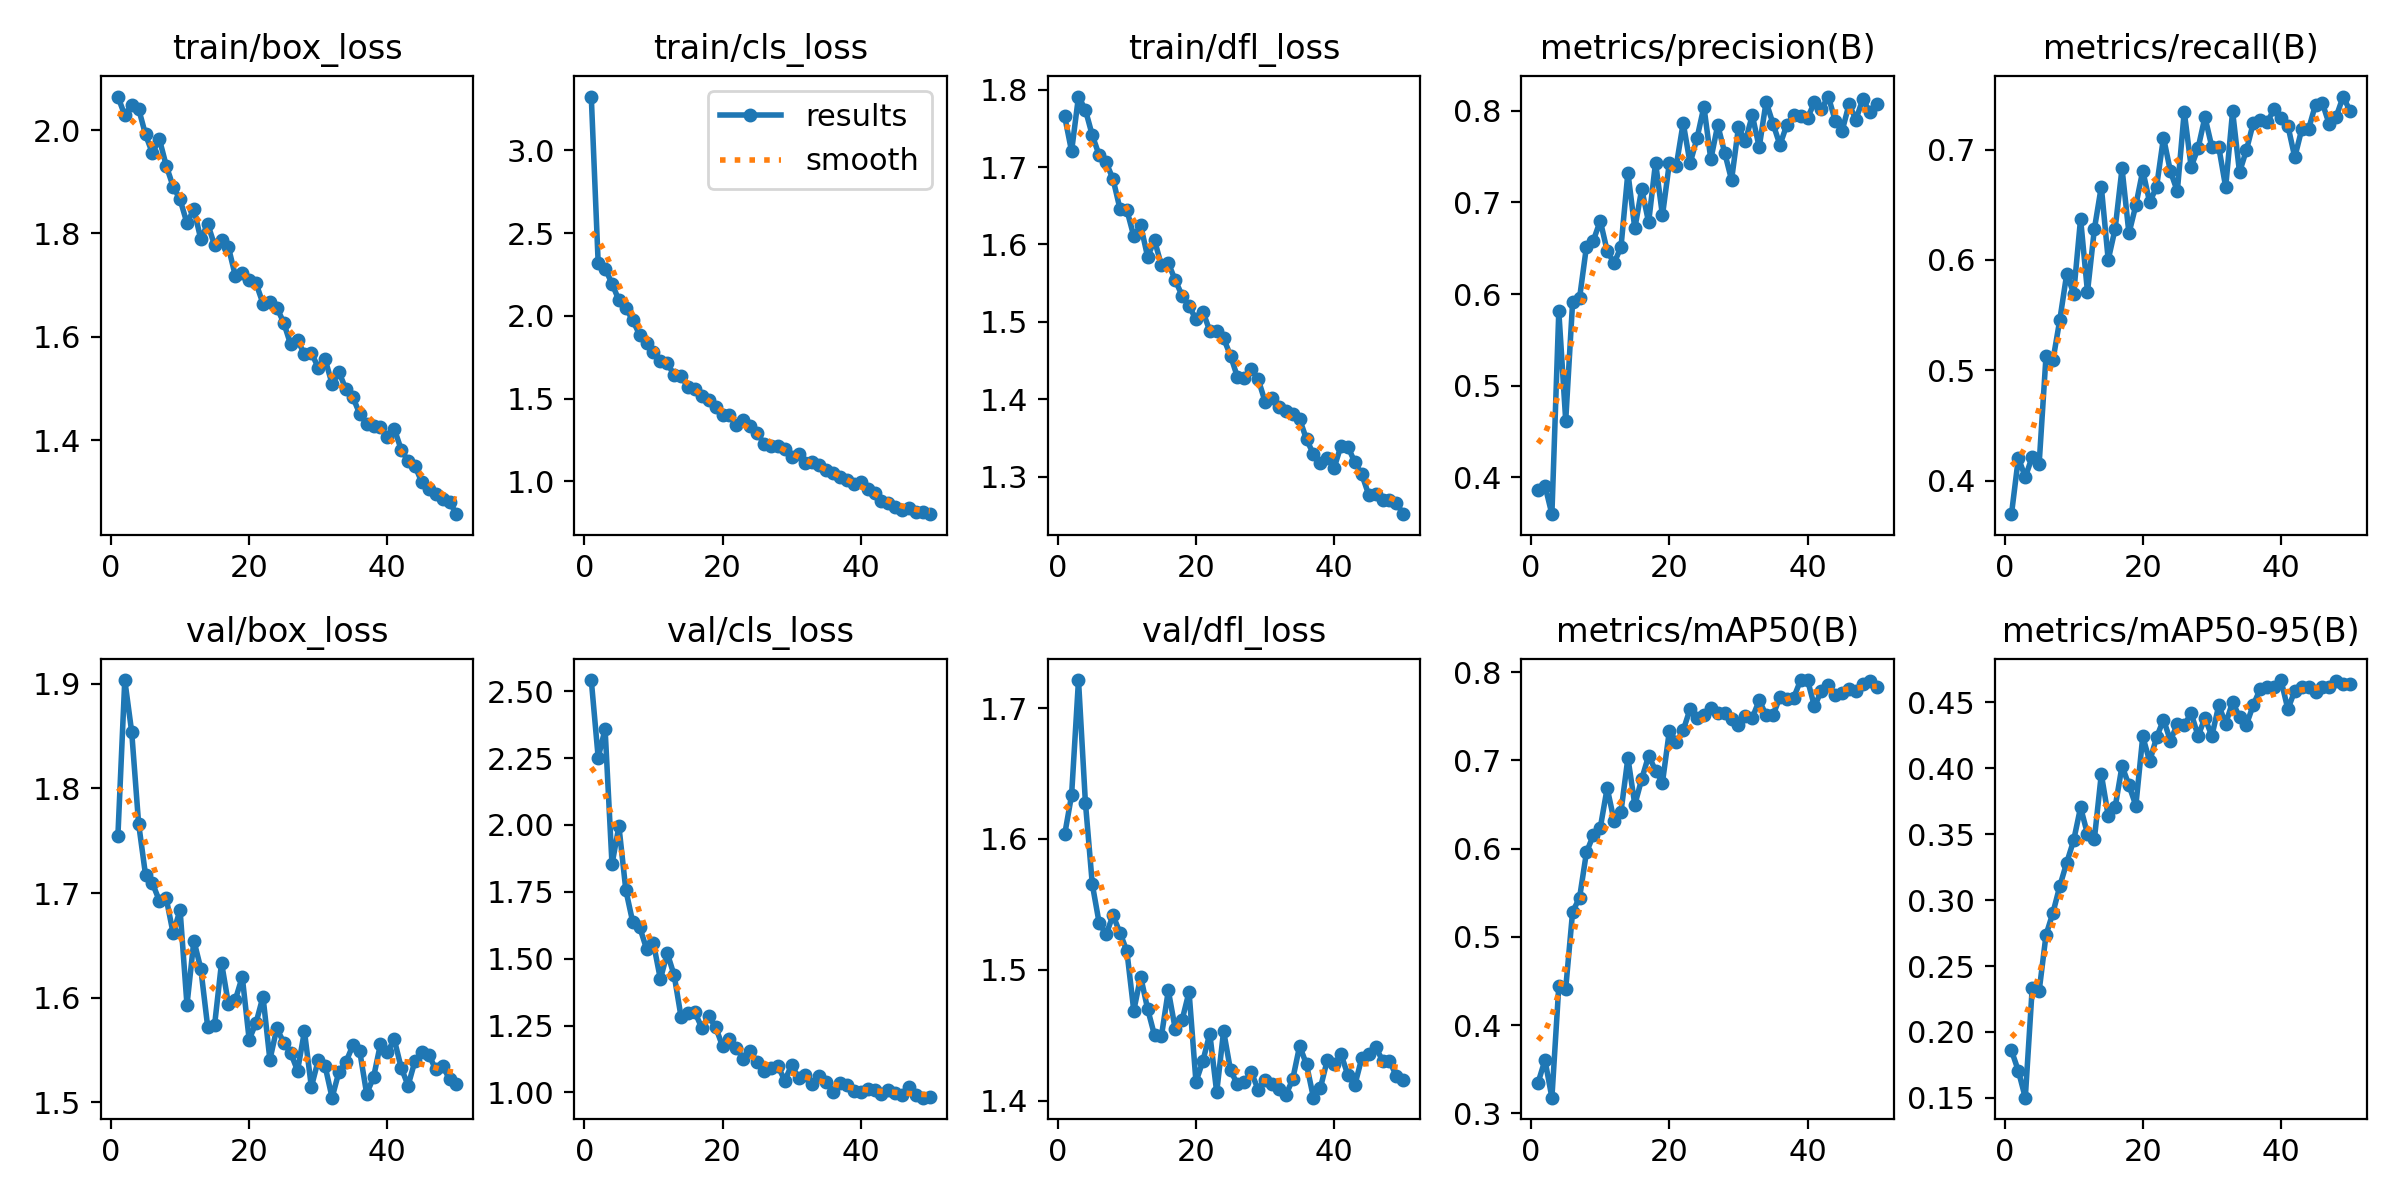

In [9]:
Image(filename='/kaggle/working//runs/detect/train/results.png', width=600)

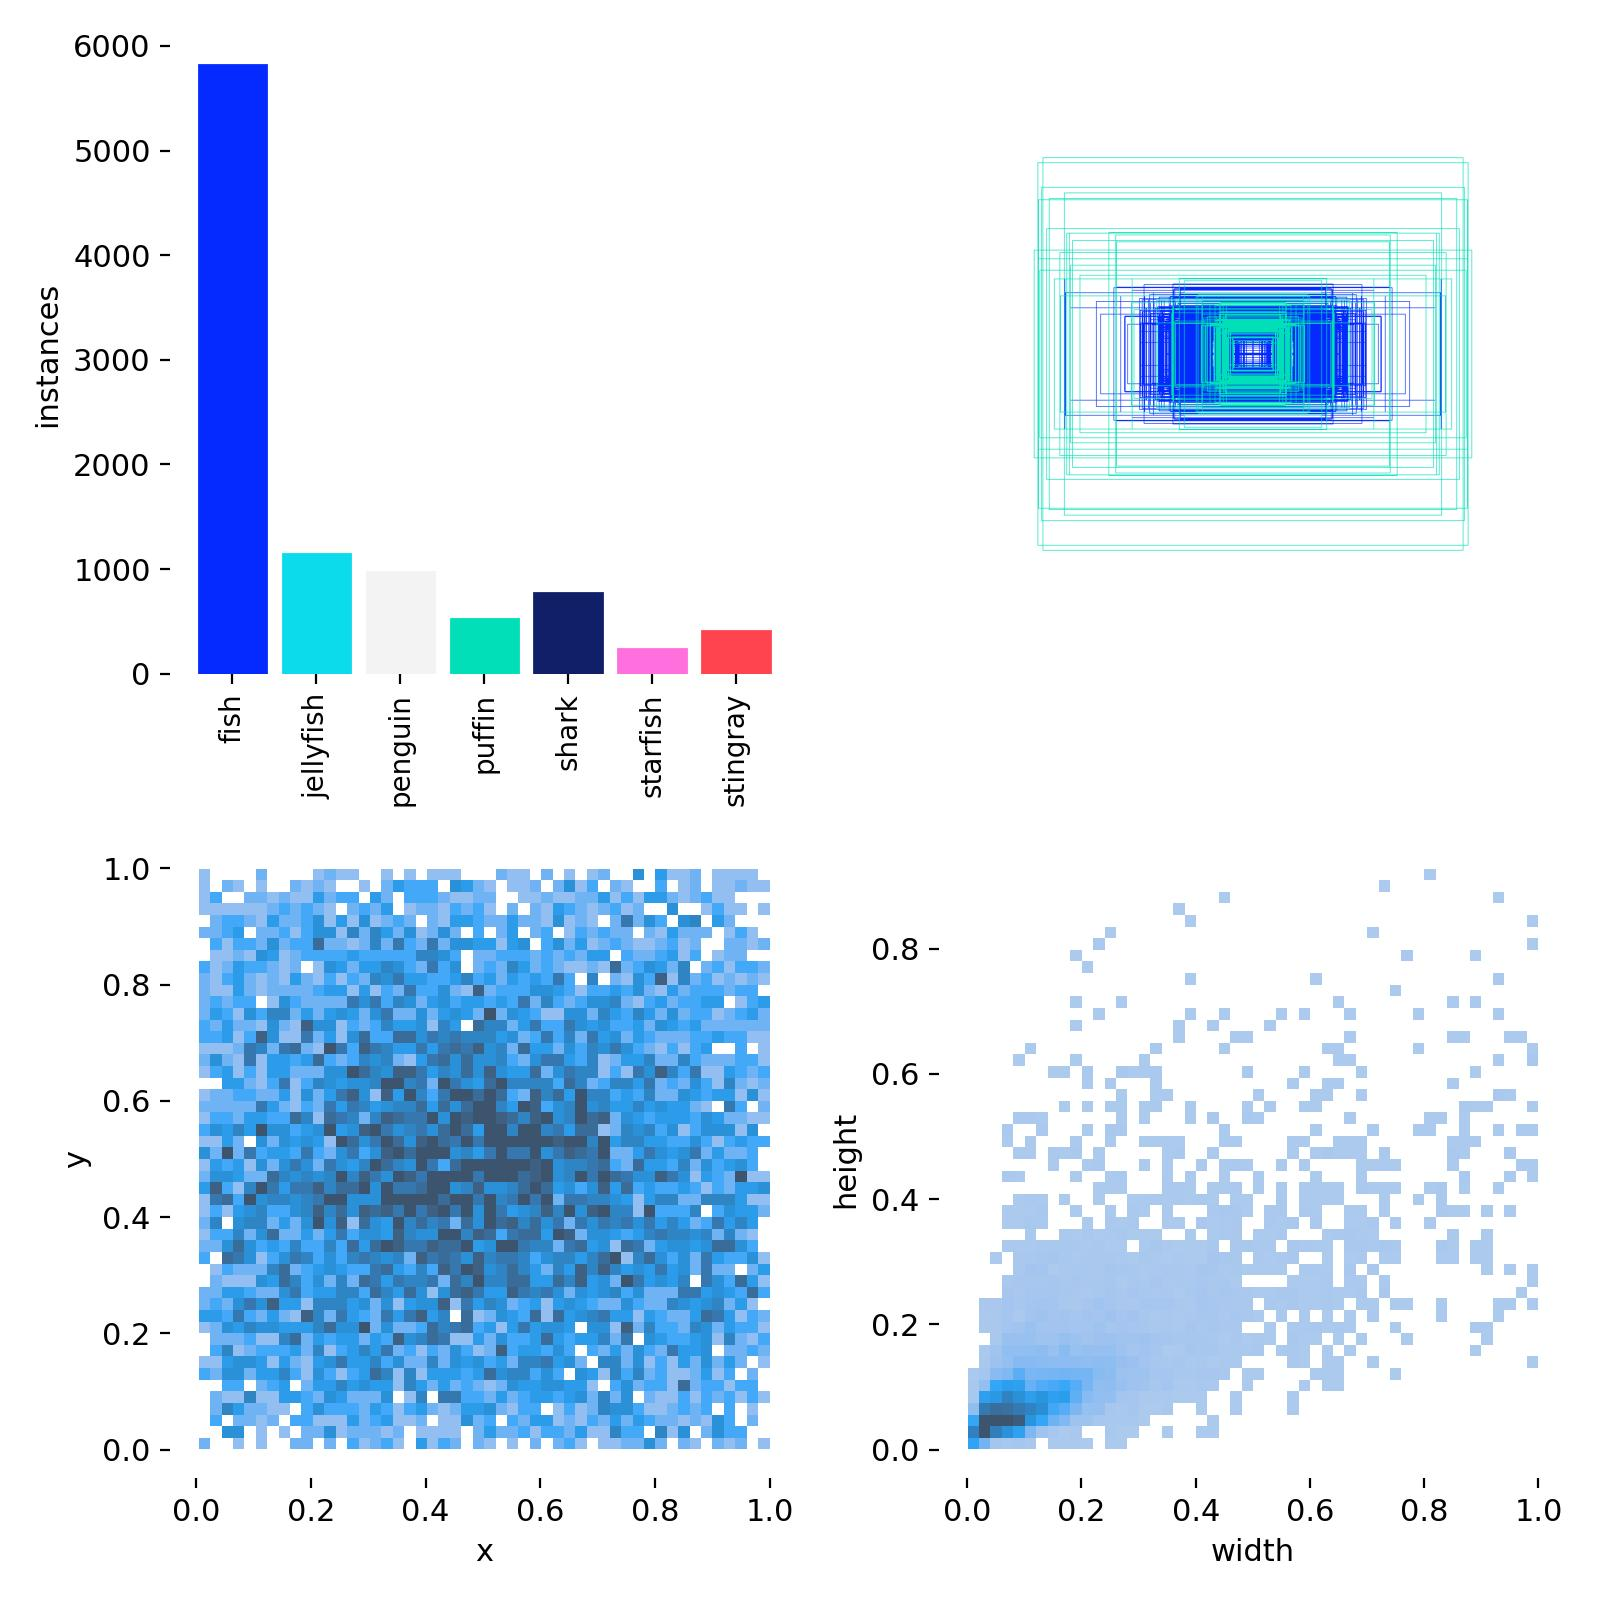

In [10]:
Image(filename='/kaggle/working/runs/detect/train/labels.jpg', width=600)

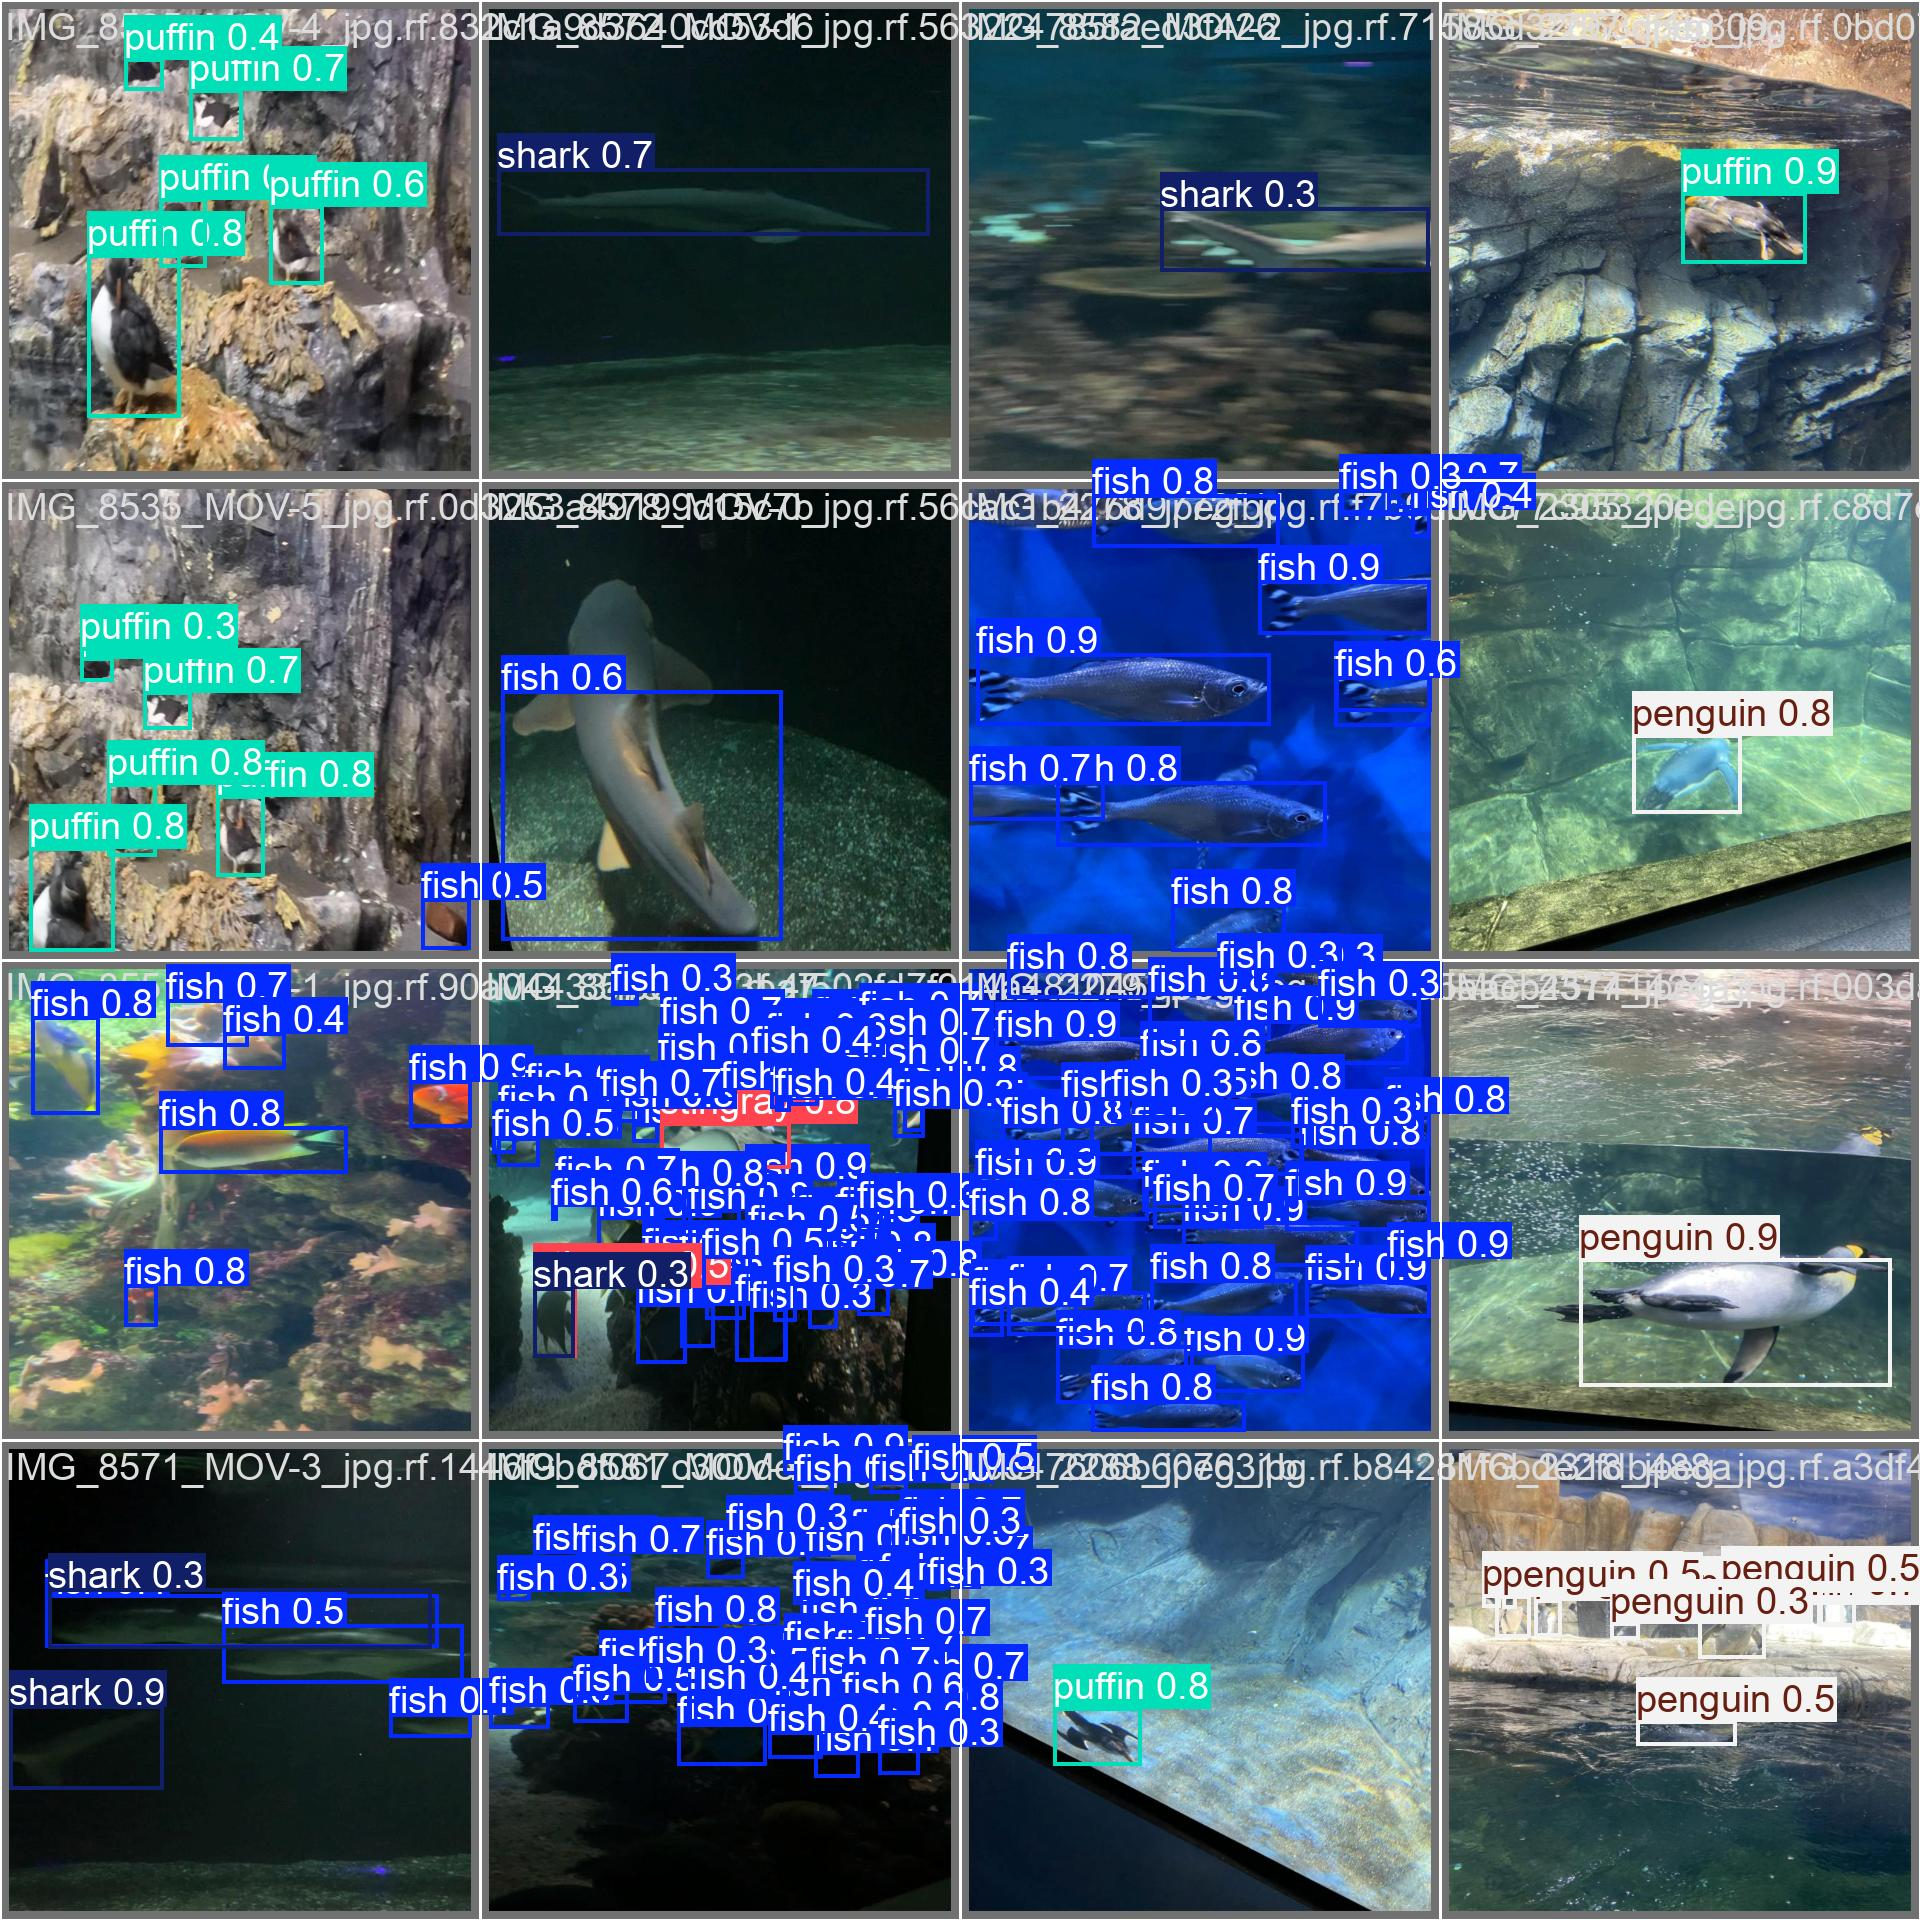

In [12]:
Image(filename=f'/kaggle/working/runs/detect/train/val_batch0_pred.jpg', width=600)

In [13]:
#Validate Custom Model

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
Ultralytics YOLOv8.2.82 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /kaggle/working/datasets/aqua-man-1/valid/labels.cache... 127 imag
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        127        909      0.791      0.726      0.788      0.467
                  fish         63        459      0.785      0.793      0.852      0.468
             jellyfish          9        155      0.847      0.942      0.958       0.56
               penguin         17        104      0.707       0.75      0.735      0.345
                puffin         15         74      0.624      0.493      0.553      0.259
                 shark         28         57      0.778      0.613      0.721       0.45
              starfish         17         27          1      0.734      0.861      0.606
              stingray         23  

In [14]:
#Inference with Custom Model

%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics YOLOv8.2.82 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs

image 1/63 /kaggle/working/datasets/aqua-man-1/test/images/IMG_2289_jpeg_jpg.rf.cfac7b690ea33c1f748596bf6e510ab3.jpg: 800x800 1 stingray, 23.3ms
image 2/63 /kaggle/working/datasets/aqua-man-1/test/images/IMG_2301_jpeg_jpg.rf.ec28334b02978485cf9660f47ddac8f4.jpg: 800x800 17 penguins, 22.9ms
image 3/63 /kaggle/working/datasets/aqua-man-1/test/images/IMG_2319_jpeg_jpg.rf.4b56d222ba8e5da7f80f7b0e7aec934b.jpg: 800x800 9 penguins, 22.9ms
image 4/63 /kaggle/working/datasets/aqua-man-1/test/images/IMG_2347_jpeg_jpg.rf.a3070dae0582d77e0807803a36cd7347.jpg: 800x800 1 penguin, 22.9ms
image 5/63 /kaggle/working/datasets/aqua-man-1/test/images/IMG_2354_jpeg_jpg.rf.68aa3af35f0c179884b1876b45bf14b4.jpg: 800x800 5 penguins, 22.9ms
image 6/63 /kaggle/working/datasets/aqua-man-1/test/images/IMG_2371_jpeg_jpg.rf.962ec185adbd90

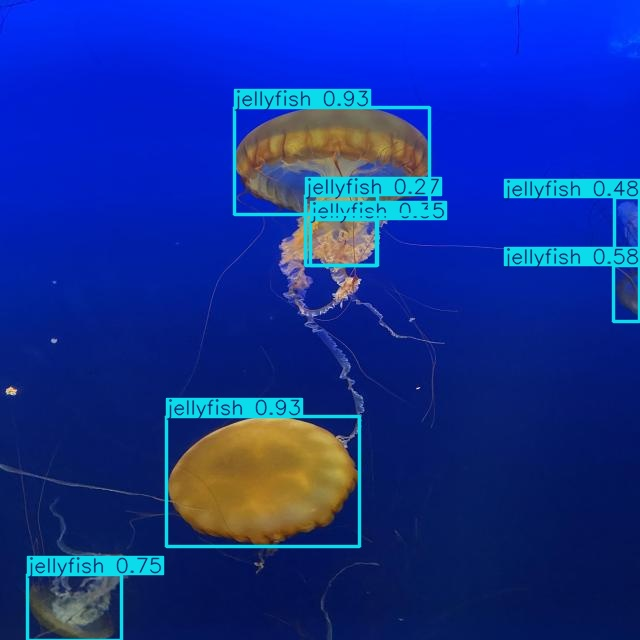

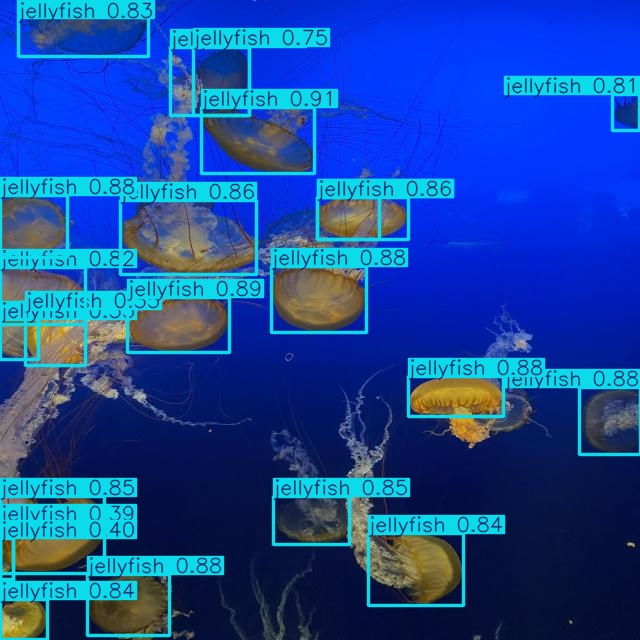

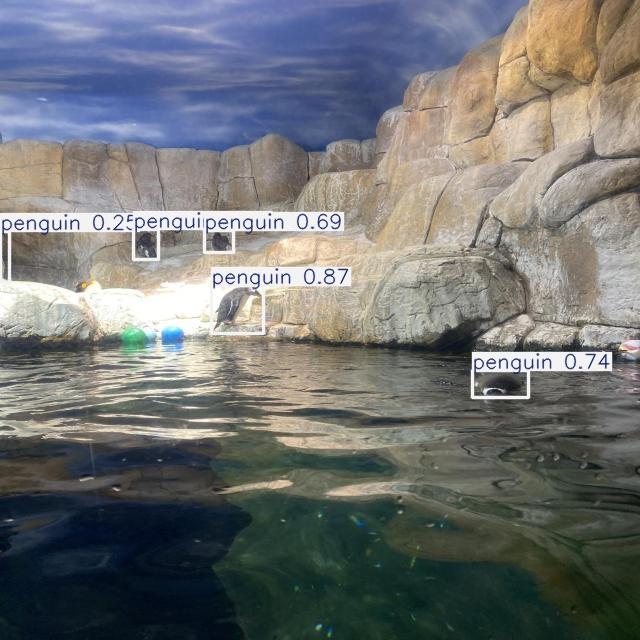

In [15]:
import glob
from IPython.display import Image, display

base_path = '/kaggle/working/runs/detect'
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]
latest_folder = max(subfolders, key=os.path.getmtime)
image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [16]:
'''from roboflow import Roboflow

rf = Roboflow(api_key='ijeTVCjBjjAlhEWscUpN')
project = rf.workspace().project('aqua-man')

# Make sure you are calling the correct method to deploy your model
response = project.uploadModel(
    version=1,
    model_format="yolov8"  # Ensure correct format, e.g., 'yolov8'
)

print("Model Upload Response:", response)
'''

'from roboflow import Roboflow\n\nrf = Roboflow(api_key=\'ijeTVCjBjjAlhEWscUpN\')\nproject = rf.workspace().project(\'aqua-man\')\n\n# Make sure you are calling the correct method to deploy your model\nresponse = project.uploadModel(\n    version=1,\n    model_format="yolov8"  # Ensure correct format, e.g., \'yolov8\'\n)\n\nprint("Model Upload Response:", response)\n'

In [17]:
from ultralytics import YOLO
import streamlit as st
from PIL import Image
import numpy as np
import joblib

model = YOLO('yolov8n.pt')
print(model)
joblib.dump(model, 'yolo_model_n.pkl')

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

['yolo_model_n.pkl']